In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_excel(r"C:\Users\Tejes\Downloads\iris (2).xls")

In [6]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [12]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [13]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [19]:
# Handling Outliers
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

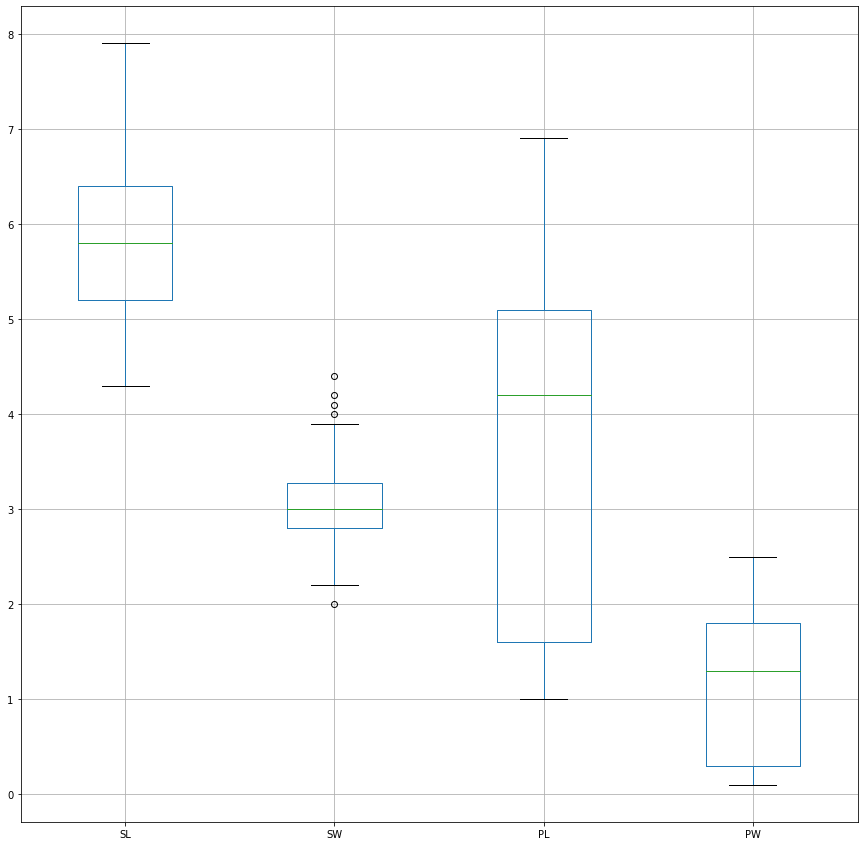

In [21]:
graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(15,15))
plt.show()

In [25]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [26]:
print(low_limit)
print(up_limit)

2.1249999999999996
3.9250000000000003


In [27]:
outlier=[]
for x in data['SW']:
    if ((x<low_limit)or(x>up_limit)):
        outlier.append(x)

In [28]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [31]:
ind=data['SW']>up_limit
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [32]:
data.drop([14, 15, 32, 33],inplace=True)

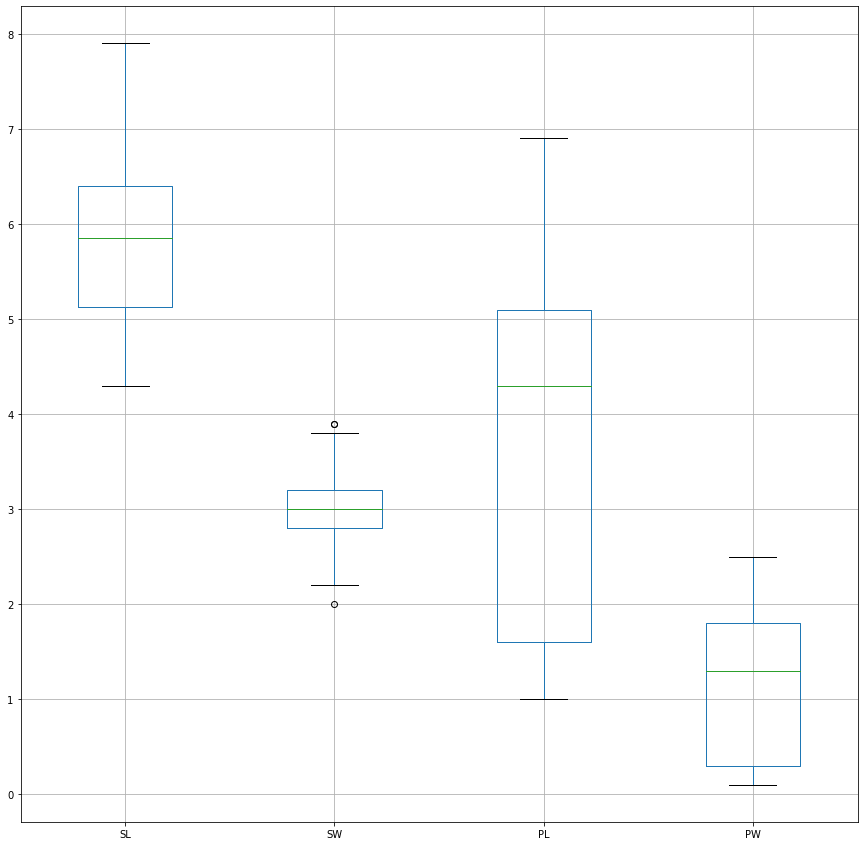

In [34]:
graph=data.select_dtypes(include=['float64'])
graph.boxplot(figsize=(15,15))
plt.show()

Outliers are handled

In [35]:
data.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,5.864326,3.018465,3.820805,1.225342
std,0.817050,0.382594,1.703421,0.755834
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.300000
50%,5.855944,3.000000,4.300000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


In [37]:
# Applying Label Encoding

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]=label.fit_transform(data[a[i]])

In [40]:
data['Classification'].value_counts()

1    50
2    50
0    46
Name: Classification, dtype: int64

In [42]:
y=data['Classification'].copy()
x=data.drop(['Classification'],axis=1).copy()

In [45]:
# Splitting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [64]:
models={
    'Logistic Regression': LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Support Vector Linear':SVC(kernel='linear'),
    'Support Vector Polynomial':SVC(kernel='poly',degree=3),
    'Support Vector Radial':SVC(kernel='rbf'),
    'Random Forest':RandomForestClassifier()
}
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name + ' trained')

C:\Users\Tejes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained
Decision Tree trained
Support Vector Linear trained
Support Vector Polynomial trained
Support Vector Radial trained
Random Forest trained


In [65]:
def confusion(y_true,y_pred):
    matrix=confusion_matrix(y_test,y_pred)
    return matrix

def accuracy(y_true,y_pred):
    score2=accuracy_score(y_test,y_pred)
    return score2

In [66]:
for name, model in models.items():
    y_pred=model.predict(x_test)
    matrix=confusion(y_test,y_pred)
    
    score_accuracy=accuracy(y_test,y_pred)
    print('\n'+ name + ' Confusion_ Matrix','\n',matrix)
  
    print('\n'+ name + ' Accuracy_score: {:.4f}'.format(score_accuracy))
    


Logistic Regression Confusion_ Matrix 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Logistic Regression Accuracy_score: 0.9333

Decision Tree Confusion_ Matrix 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Decision Tree Accuracy_score: 0.9333

Support Vector Linear Confusion_ Matrix 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Support Vector Linear Accuracy_score: 0.9333

Support Vector Polynomial Confusion_ Matrix 
 [[12  0  0]
 [ 0  6  2]
 [ 0  0 10]]

Support Vector Polynomial Accuracy_score: 0.9333

Support Vector Radial Confusion_ Matrix 
 [[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]

Support Vector Radial Accuracy_score: 0.9333

Random Forest Confusion_ Matrix 
 [[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]

Random Forest Accuracy_score: 0.9333


In [69]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [70]:
acc_values

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 1.0]

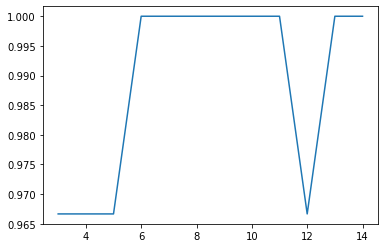

In [71]:
plt.plot(neighbors,acc_values)
plt.show()

In [72]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('K Nearest Neighbor Accuracy Score: ',acc)

K Nearest Neighbor Accuracy Score:  1.0
